In [2]:
# Libraries
#invite people for the Kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from scipy import stats
from pandas import Series, DataFrame
from pandas.plotting import autocorrelation_plot
#from pandas.tools.plotting import scatter_matrix
from pylab import rcParams
from matplotlib import collections as collections
from matplotlib.patches import Rectangle
from itertools import cycle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

rcParams['figure.figsize'] = 5,4
sb.set_style('whitegrid')
from numpy import median
from numpy import mean

In [3]:
df = pd.read_csv('credit-g1.csv')

In [4]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,'no known property',31,bank,'for free',1,skilled,1,yes,yes,good
2,'no checking',12.0,'existing paid',radio/tv,1262.0,<100,1<=X<4,3,'male single',none,...,car,25,none,own,1,skilled,1,none,yes,good
3,'no checking',12.0,'critical/other existing credit',radio/tv,618.0,<100,>=7,4,'male single',none,...,'real estate',56,none,own,1,skilled,1,none,yes,good
4,'no checking',24.0,'existing paid','new car',1469.0,100<=X<500,>=7,4,'male mar/wid',none,...,'real estate',41,none,rent,1,'unskilled resident',1,none,yes,good


In [5]:

print('Cantidad de filas:', len(df))

Cantidad de filas: 51


In [6]:
# Pregunta 1
#Quitar filas duplicadas
df.drop_duplicates(subset=None, inplace=True)
# esta funcion no retorna otro dataframe

In [7]:
print ('Cantidad de filas despues de eliminar duplicados', len(df))

Cantidad de filas despues de eliminar duplicados 50


In [8]:
# funcion para recuperar duplicados
def getDuplicateColumns(df):
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x] # ubica el indice
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [9]:
# Get list of duplicate columns
columnasDuplicadas = getDuplicateColumns(df)
print('columnas duplicadas')
print('Las Columnas duplicadas son:')
for col in columnasDuplicadas:
    print('Columna : ', col)

columnas duplicadas
Las Columnas duplicadas son:


In [10]:
#Pregunta 2
# Eliminar columnas  duplicadas
nuevoDf = df.drop(columns=getDuplicateColumns(df))
print("Dataframe Modificado", nuevoDf, sep='\n')

Dataframe Modificado
   checking_status  duration                    credit_history  \
0    'no checking'      24.0                   'existing paid'   
1    'no checking'      48.0  'critical/other existing credit'   
2    'no checking'      12.0                   'existing paid'   
3    'no checking'      12.0  'critical/other existing credit'   
4    'no checking'      24.0                   'existing paid'   
5               <0      12.0  'critical/other existing credit'   
6    'no checking'      15.0                   'existing paid'   
7         0<=X<200      11.0                   'existing paid'   
8               <0      12.0                   'existing paid'   
9    'no checking'      27.0              'delayed previously'   
10              <0      30.0  'critical/other existing credit'   
11   'no checking'      12.0                   'existing paid'   
12              <0       NaN             'no credits/all paid'   
13   'no checking'      12.0  'critical/other existing 

In [11]:
# Pregunta 3
#Identificar columnas que tienen valores constantes
def drop_constant_columns(dataframe):
    result = dataframe.copy()
    for column in dataframe.columns:
        if len(dataframe[column].unique()) == 1:
            result = result.drop(column,axis=1)
    return result


In [12]:
# Eliminar columnas constante
df1 = drop_constant_columns(df)

In [13]:
print('El dataframe nuevo', df1.columns)

El dataframe nuevo Index(['checking_status', 'duration', 'credit_history', 'purpose',
       'credit_amount', 'savings_status', 'employment',
       'installment_commitment', 'personal_status', 'other_parties',
       'residence_since', 'property_magnitude', 'age', 'other_payment_plans',
       'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone',
       'foreign_worker', 'class'],
      dtype='object')


In [14]:
# pregunta 4
# data faltante

total = df.isnull().sum().sort_values(ascending=False)
porcentaje = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dataFaltante = pd.concat([total, porcentaje], axis=1, keys=['Total', 'Percent'])
dataFaltante.head(20)


,Total,Percent
duration,3,0.06
credit_amount,3,0.06
class,0,0.00
other_parties,0,0.00
credit_history,0,0.00
purpose,0,0.00
savings_status,0,0.00
employment,0,0.00
installment_commitment,0,0.00
personal_status,0,0.00


In [15]:
df.isnull().sum()

checking_status           0
duration                  3
credit_history            0
purpose                   0
credit_amount             3
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


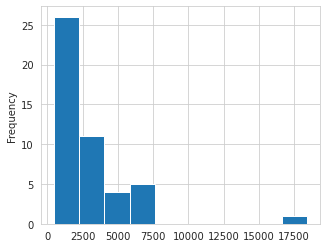

In [16]:
#Pregunta 5 Graficos
df.head()
#cars.index = cars.car_names
credit_amount = df['credit_amount']
prueba = credit_amount.plot(kind = 'hist')
print(prueba)

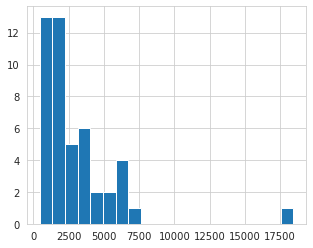

In [17]:
# Otra manera
plt.hist(credit_amount, bins=20)
plt.show()
# 

In [18]:
quantiles = df['credit_amount'].quantile([0.25,0.5,0.75])
print(quantiles)
# para los quantiles se ordena
# el 25% de los creditos llega a 1262.
# el 50% llega a 1980.


0.25    1262.0
0.50    1980.0
0.75    3559.5
Name: credit_amount, dtype: float64


<AxesSubplot:>

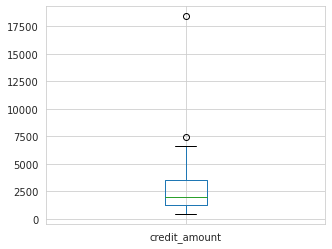

In [19]:
df.boxplot(column='credit_amount')

<AxesSubplot:xlabel='duration', ylabel='credit_amount'>

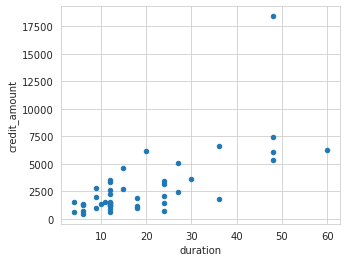

In [20]:
df.head()
df.plot(kind='scatter', x='duration', y='credit_amount')
# la relacion entre las dos variables es directa/ascendente

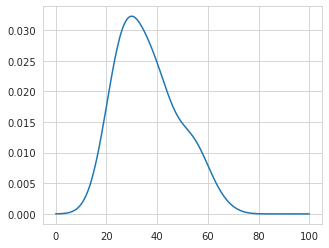

In [21]:
from scipy.stats import gaussian_kde
density = gaussian_kde(df.age)
 
x_vals = np.linspace(0,100,200) # especificando limites
density.covariance_factor = lambda : .5 #constante de suavizamiento
 
density._compute_covariance()
plt.plot(x_vals,density(x_vals))
plt.show()

In [22]:
# Pregunta 6
# Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
df['nueva_columna'] = df['credit_amount']/df['duration']*df['residence_since']
df['nueva_columna']
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,nueva_columna
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,31,none,own,1,skilled,2,yes,yes,good,285.833333
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,31,bank,'for free',1,skilled,1,yes,yes,good,381.875000
2,'no checking',12.0,'existing paid',radio/tv,1262.0,<100,1<=X<4,3,'male single',none,...,25,none,own,1,skilled,1,none,yes,good,210.333333
3,'no checking',12.0,'critical/other existing credit',radio/tv,618.0,<100,>=7,4,'male single',none,...,56,none,own,1,skilled,1,none,yes,good,206.000000
4,'no checking',24.0,'existing paid','new car',1469.0,100<=X<500,>=7,4,'male mar/wid',none,...,41,none,rent,1,'unskilled resident',1,none,yes,good,244.833333
5,<0,12.0,'critical/other existing credit','new car',3499.0,<100,1<=X<4,3,'female div/dep/mar','co applicant',...,29,none,own,2,skilled,1,none,yes,bad,583.166667
6,'no checking',15.0,'existing paid',furniture/equipment,2708.0,<100,<1,2,'male single',none,...,27,bank,own,2,'unskilled resident',1,none,yes,good,541.600000
7,0<=X<200,11.0,'existing paid',furniture/equipment,1577.0,>=1000,<1,4,'female div/dep/mar',none,...,20,none,own,1,skilled,1,none,yes,good,143.363636
8,<0,12.0,'existing paid','new car',1168.0,<100,1<=X<4,4,'male mar/wid',none,...,27,none,own,1,'unskilled resident',1,none,yes,good,292.000000
9,'no checking',27.0,'delayed previously',business,5117.0,<100,4<=X<7,3,'male single',none,...,26,none,own,2,skilled,1,none,yes,good,758.074074


In [23]:
#Pregunta 7
#Obtenga una muestra para cada conjunto de Training, Testing y Validation

# select a random sample without replacement
from random import seed
array = seed(0,50) # Generate Data

print(array)
#pendiente

None


0          (1.0, 5000.0]
1      (5000.0, 10000.0]
2          (1.0, 5000.0]
3          (1.0, 5000.0]
4          (1.0, 5000.0]
5          (1.0, 5000.0]
6          (1.0, 5000.0]
7          (1.0, 5000.0]
8          (1.0, 5000.0]
9      (5000.0, 10000.0]
10                   NaN
11         (1.0, 5000.0]
12         (1.0, 5000.0]
13         (1.0, 5000.0]
14         (1.0, 5000.0]
15     (5000.0, 10000.0]
16         (1.0, 5000.0]
17         (1.0, 5000.0]
18         (1.0, 5000.0]
19         (1.0, 5000.0]
20         (1.0, 5000.0]
21         (1.0, 5000.0]
22         (1.0, 5000.0]
23         (1.0, 5000.0]
24         (1.0, 5000.0]
25                   NaN
26         (1.0, 5000.0]
27         (1.0, 5000.0]
28         (1.0, 5000.0]
29         (1.0, 5000.0]
30         (1.0, 5000.0]
31         (1.0, 5000.0]
32     (5000.0, 10000.0]
33         (1.0, 5000.0]
34         (1.0, 5000.0]
35         (1.0, 5000.0]
36     (5000.0, 10000.0]
37                   NaN
38         (1.0, 5000.0]
39         (1.0, 5000.0]


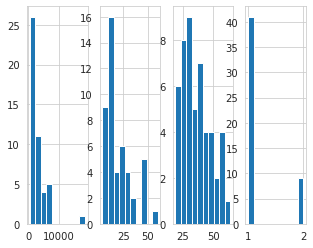

In [24]:
#Pregunta 8
#discretizar duración, credit_amount, age, number_of_dependents.

fig, axs = plt.subplots(1,4) 
axs[0].hist(df.credit_amount)
axs[1].hist(df.duration)
axs[2].hist(df.age)
axs[3].hist(df.num_dependents)
df['credit_amount_discretizado'] = pd.cut(x=df['credit_amount'], bins=[1, 5000, 10000, 15000, 20000]) 
print(df['credit_amount_discretizado']) #

In [25]:
#Pregunta 9
# Obtenga la matriz de correlación de las variables numéricas.
#
df_columnas_numericas = df.select_dtypes(include=[np.number])
corrmat = df_columnas_numericas.corr()
print(corrmat)


                        duration  credit_amount  installment_commitment  \
duration                1.000000       0.690998                0.234344   
credit_amount           0.690998       1.000000               -0.180046   
installment_commitment  0.234344      -0.180046                1.000000   
residence_since         0.188127      -0.039675                0.271175   
age                     0.227147      -0.024088                0.199536   
existing_credits       -0.008095      -0.040472                0.172139   
num_dependents         -0.166228      -0.062555               -0.272795   
nueva_columna          -0.000011       0.412990               -0.282555   

                        residence_since       age  existing_credits  \
duration                       0.188127  0.227147         -0.008095   
credit_amount                 -0.039675 -0.024088         -0.040472   
installment_commitment         0.271175  0.199536          0.172139   
residence_since                1.000000 

(8.5, -0.5)

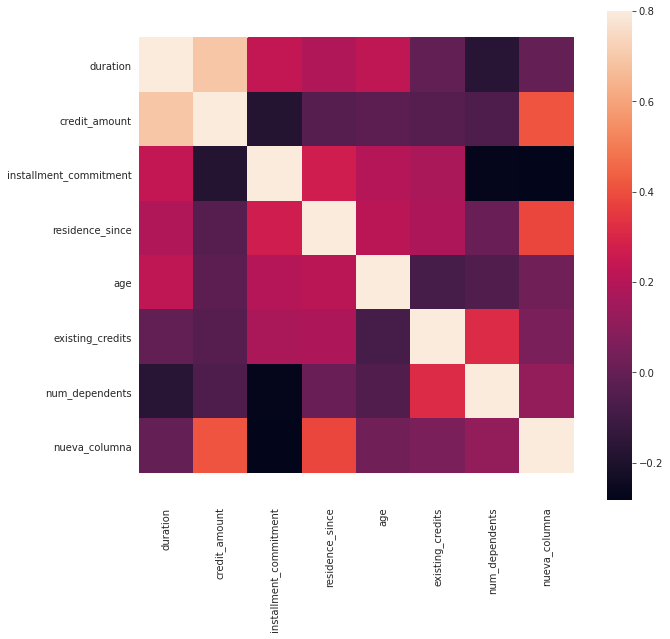

In [26]:
#correlation matrix
f, ax = plt.subplots(figsize=(12, 9))
sb.heatmap(corrmat, vmax=.8, square=True);
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [27]:
#Pregunta 10
#Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.

data_crosstab = pd.crosstab(df['job'], df['purpose'], margins = False) 
data_crosstab

purpose,'new car','used car',business,education,furniture/equipment,other,radio/tv,repairs
job,,,,,,,,
'high qualif/self emp/mgmt',1,1,1,2,1,1,0,0
'unemp/unskilled non res',0,0,0,0,0,1,0,0
'unskilled resident',3,0,0,0,3,0,3,0
skilled,6,3,3,3,7,0,10,1


In [28]:
#Pregunta 11
#Mapear a valores diferentes para atributos own_telephone, foreign_worker.

foreign_diccionario = {'yes': 1, 'no': 0}
own_telephone_diccionario = {'yes': 1, 'none': 0}
df['foreign_mapeado'] = df['foreign_worker'].map(foreign_diccionario)
df['own_telephone_mapeado'] = df['own_telephone'].map(own_telephone_diccionario)
df
#del tips['Gender']

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,nueva_columna,credit_amount_discretizado,foreign_mapeado,own_telephone_mapeado
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,1,skilled,2,yes,yes,good,285.833333,"(1.0, 5000.0]",1,1
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,1,skilled,1,yes,yes,good,381.875000,"(5000.0, 10000.0]",1,1
2,'no checking',12.0,'existing paid',radio/tv,1262.0,<100,1<=X<4,3,'male single',none,...,1,skilled,1,none,yes,good,210.333333,"(1.0, 5000.0]",1,0
3,'no checking',12.0,'critical/other existing credit',radio/tv,618.0,<100,>=7,4,'male single',none,...,1,skilled,1,none,yes,good,206.000000,"(1.0, 5000.0]",1,0
4,'no checking',24.0,'existing paid','new car',1469.0,100<=X<500,>=7,4,'male mar/wid',none,...,1,'unskilled resident',1,none,yes,good,244.833333,"(1.0, 5000.0]",1,0
5,<0,12.0,'critical/other existing credit','new car',3499.0,<100,1<=X<4,3,'female div/dep/mar','co applicant',...,2,skilled,1,none,yes,bad,583.166667,"(1.0, 5000.0]",1,0
6,'no checking',15.0,'existing paid',furniture/equipment,2708.0,<100,<1,2,'male single',none,...,2,'unskilled resident',1,none,yes,good,541.600000,"(1.0, 5000.0]",1,0
7,0<=X<200,11.0,'existing paid',furniture/equipment,1577.0,>=1000,<1,4,'female div/dep/mar',none,...,1,skilled,1,none,yes,good,143.363636,"(1.0, 5000.0]",1,0
8,<0,12.0,'existing paid','new car',1168.0,<100,1<=X<4,4,'male mar/wid',none,...,1,'unskilled resident',1,none,yes,good,292.000000,"(1.0, 5000.0]",1,0
9,'no checking',27.0,'delayed previously',business,5117.0,<100,4<=X<7,3,'male single',none,...,2,skilled,1,none,yes,good,758.074074,"(5000.0, 10000.0]",1,0


In [29]:
#Pregunta 12
# Normalizar el campo instalment_commitment por frecuencia.
names = ['installment_commitment'] # or names = df.columns
# Normalize total_bedrooms column
#x_array = np.array(titanic['Fare'])
x_array = np.array(df['installment_commitment'])
normalized_X = preprocessing.normalize([x_array])
normalized_df = pd.DataFrame(normalized_X.flatten(), columns=names)
normalized_X
normalized_df

,installment_commitment
0,0.134704
1,0.044901
2,0.134704
3,0.179605
4,0.179605
5,0.134704
6,0.089803
7,0.179605
8,0.179605
9,0.134704


In [30]:
#Pregunta 13
#Normalizar el campo instalment_commitment en el rango (-1,2)
minimo = df['installment_commitment'].min()
maximo = df['installment_commitment'].max()
minimo,maximo
df['installment_commitment_normalized']= 3*((df['installment_commitment'] - minimo)/(maximo - minimo)) -1
df

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,nueva_columna,credit_amount_discretizado,foreign_mapeado,own_telephone_mapeado,installment_commitment_normalized
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,skilled,2,yes,yes,good,285.833333,"(1.0, 5000.0]",1,1,1.0
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,skilled,1,yes,yes,good,381.875000,"(5000.0, 10000.0]",1,1,-1.0
2,'no checking',12.0,'existing paid',radio/tv,1262.0,<100,1<=X<4,3,'male single',none,...,skilled,1,none,yes,good,210.333333,"(1.0, 5000.0]",1,0,1.0
3,'no checking',12.0,'critical/other existing credit',radio/tv,618.0,<100,>=7,4,'male single',none,...,skilled,1,none,yes,good,206.000000,"(1.0, 5000.0]",1,0,2.0
4,'no checking',24.0,'existing paid','new car',1469.0,100<=X<500,>=7,4,'male mar/wid',none,...,'unskilled resident',1,none,yes,good,244.833333,"(1.0, 5000.0]",1,0,2.0
5,<0,12.0,'critical/other existing credit','new car',3499.0,<100,1<=X<4,3,'female div/dep/mar','co applicant',...,skilled,1,none,yes,bad,583.166667,"(1.0, 5000.0]",1,0,1.0
6,'no checking',15.0,'existing paid',furniture/equipment,2708.0,<100,<1,2,'male single',none,...,'unskilled resident',1,none,yes,good,541.600000,"(1.0, 5000.0]",1,0,0.0
7,0<=X<200,11.0,'existing paid',furniture/equipment,1577.0,>=1000,<1,4,'female div/dep/mar',none,...,skilled,1,none,yes,good,143.363636,"(1.0, 5000.0]",1,0,2.0
8,<0,12.0,'existing paid','new car',1168.0,<100,1<=X<4,4,'male mar/wid',none,...,'unskilled resident',1,none,yes,good,292.000000,"(1.0, 5000.0]",1,0,2.0
9,'no checking',27.0,'delayed previously',business,5117.0,<100,4<=X<7,3,'male single',none,...,skilled,1,none,yes,good,758.074074,"(5000.0, 10000.0]",1,0,1.0


<AxesSubplot:>

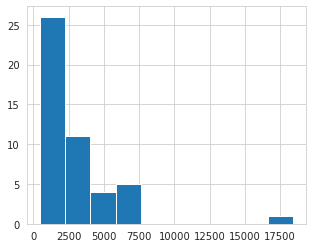

In [31]:
#Pregunta 14
#Detectar outliers por medio de Inter-quartil range
#TRabajaremos con credit amount
df['credit_amount'].hist()

In [32]:
def rm_IQR_outliers(df, var):
    q1 = df[var].quantile(.25)
    q3 = df[var].quantile(.75)
    iqr = q3-q1
    h = 3*iqr # originally 1.5
    df.loc[df[var] > q3+h, var] = q3+h
    df.loc[df[var] < q1-h, var] = q1-h

In [33]:
df.credit_amount.describe()

count       47.000000
mean      2947.914894
std       2947.799547
min        448.000000
25%       1262.000000
50%       1980.000000
75%       3559.500000
max      18424.000000
Name: credit_amount, dtype: float64

In [34]:
rm_IQR_outliers(df, 'credit_amount')

In [35]:
df.credit_amount.describe()

count       47.000000
mean      2778.297872
std       2162.767530
min        448.000000
25%       1262.000000
50%       1980.000000
75%       3559.500000
max      10452.000000
Name: credit_amount, dtype: float64

In [36]:
#Pregunta 15
#Utilice One-hot encoding en campo purpose.
df.columns
df_aux = df[['purpose']]

df_aux = DataFrame(df_aux, columns=['purpose'])
categoria_columns = ["purpose"]
df_aux = pd.get_dummies(df_aux, prefix_sep="_",
                            columns=categoria_columns)
df_aux

,purpose_'new car',purpose_'used car',purpose_business,purpose_education,purpose_furniture/equipment,purpose_other,purpose_radio/tv,purpose_repairs
0,0,0,0,0,0,0,1,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,1,0
4,1,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0
7,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0


In [37]:
#Pregunta 16
#Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000\

df.query('credit_amount >3000')


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,nueva_columna,credit_amount_discretizado,foreign_mapeado,own_telephone_mapeado,installment_commitment_normalized
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,skilled,2,yes,yes,good,285.833333,"(1, 5000]",1,1,1.0
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,skilled,1,yes,yes,good,381.875000,"(5000, 10000]",1,1,-1.0
5,<0,12.0,'critical/other existing credit','new car',3499.0,<100,1<=X<4,3,'female div/dep/mar','co applicant',...,skilled,1,none,yes,bad,583.166667,"(1, 5000]",1,0,1.0
9,'no checking',27.0,'delayed previously',business,5117.0,<100,4<=X<7,3,'male single',none,...,skilled,1,none,yes,good,758.074074,"(5000, 10000]",1,0,1.0
12,<0,NaN,'no credits/all paid','used car',4605.0,<100,>=7,3,'male single',none,...,skilled,2,none,yes,bad,NaN,"(1, 5000]",1,0,1.0
15,0<=X<200,48.0,'existing paid',other,5381.0,'no known savings',unemployed,3,'male single',none,...,'unemp/unskilled non res',1,yes,yes,good,448.416667,"(5000, 10000]",1,1,1.0
23,<0,NaN,'existing paid',furniture/equipment,3620.0,<100,1<=X<4,1,'male single',guarantor,...,skilled,2,none,yes,good,NaN,"(1, 5000]",1,0,-1.0
31,'no checking',15.0,'existing paid',education,4623.0,100<=X<500,1<=X<4,3,'male single',none,...,'high qualif/self emp/mgmt',1,yes,yes,bad,616.400000,"(1, 5000]",1,1,1.0
32,<0,48.0,'existing paid',education,7476.0,<100,4<=X<7,4,'male single',none,...,'high qualif/self emp/mgmt',1,yes,yes,good,155.750000,"(5000, 10000]",1,1,2.0
35,>=200,24.0,'critical/other existing credit',radio/tv,3148.0,'no known savings',1<=X<4,3,'male single',none,...,skilled,1,yes,yes,good,262.333333,"(1, 5000]",1,1,1.0


In [38]:
#Pregunta17
#Obtenga las instancias que cumplen con la condición de 
#que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000
df.query("credit_amount >2000 & job=='skilled'")

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,job,num_dependents,own_telephone,foreign_worker,class,nueva_columna,credit_amount_discretizado,foreign_mapeado,own_telephone_mapeado,installment_commitment_normalized
0,'no checking',24.0,'existing paid',radio/tv,3430.0,500<=X<1000,>=7,3,'male single',none,...,skilled,2,yes,yes,good,285.833333,"(1, 5000]",1,1,1.0
1,'no checking',48.0,'critical/other existing credit',education,6110.0,<100,1<=X<4,1,'male single',none,...,skilled,1,yes,yes,good,381.875000,"(5000, 10000]",1,1,-1.0
5,<0,12.0,'critical/other existing credit','new car',3499.0,<100,1<=X<4,3,'female div/dep/mar','co applicant',...,skilled,1,none,yes,bad,583.166667,"(1, 5000]",1,0,1.0
9,'no checking',27.0,'delayed previously',business,5117.0,<100,4<=X<7,3,'male single',none,...,skilled,1,none,yes,good,758.074074,"(5000, 10000]",1,0,1.0
12,<0,NaN,'no credits/all paid','used car',4605.0,<100,>=7,3,'male single',none,...,skilled,2,none,yes,bad,NaN,"(1, 5000]",1,0,1.0
21,'no checking',24.0,'critical/other existing credit',repairs,2058.0,<100,1<=X<4,4,'male div/sep',none,...,skilled,1,yes,yes,good,171.500000,"(1, 5000]",1,1,2.0
23,<0,NaN,'existing paid',furniture/equipment,3620.0,<100,1<=X<4,1,'male single',guarantor,...,skilled,2,none,yes,good,NaN,"(1, 5000]",1,0,-1.0
29,<0,9.0,'critical/other existing credit','new car',2799.0,<100,1<=X<4,2,'male single',none,...,skilled,2,none,yes,good,622.000000,"(1, 5000]",1,0,0.0
34,0<=X<200,NaN,'existing paid',radio/tv,2896.0,100<=X<500,<1,2,'male single',none,...,skilled,1,none,yes,good,NaN,"(1, 5000]",1,0,0.0
35,>=200,24.0,'critical/other existing credit',radio/tv,3148.0,'no known savings',1<=X<4,3,'male single',none,...,skilled,1,yes,yes,good,262.333333,"(1, 5000]",1,1,1.0


In [74]:
#Pregunta 18
#Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”. NO SE COMO PONER APOSTROFEE
df.columns
df.query("purpose=='business'").groupby(["purpose"]).sum().reset_index()

,purpose,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents,nueva_columna,foreign_mapeado,own_telephone_mapeado,installment_commitment_normalized
0,business,27.0,5117.0,3.0,4.0,26.0,2.0,1.0,758.074074,1.0,0.0,1.0
